# Linear Classification and Logistic Regression on Breast Cancer Dataset

## Objective
This exercise explores the application of logistic and linear regression on the Breast Cancer dataset. The notebook will demonstrate model implementation, evaluation, visualization, and comparison, focusing on the difference in performance when using more complex data.

### Table of Contents
1. Introduction
2. Dataset Overview
3. Data Preprocessing
4. Model Implementation
5. Model Evaluation
6. Hyperparameter Tuning
7. Visualization of Results and Comparison
8. Conclusion and Discussion

### Linear Classification and Logistic Regression on Breast Cancer Dataset
In this notebook, we will explore logistic regression and linear regression on the Breast Cancer dataset. The goal is to compare the performance of both models and analyze their decision boundaries on a more complex dataset.

We will:
- Load and preprocess the Breast Cancer dataset.
- Implement logistic and linear regression models.
- Evaluate and compare their performance using multiple metrics.
- Visualize the decision boundaries.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()

In [16]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [29]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [26]:
list(data.target_names)

['malignant', 'benign']

In [38]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

profile = ProfileReport(df, title="Profiling Report")
# profile.to_notebook_iframe()
# profile.to_widgets()

target
1    357
0    212
Name: count, dtype: int64


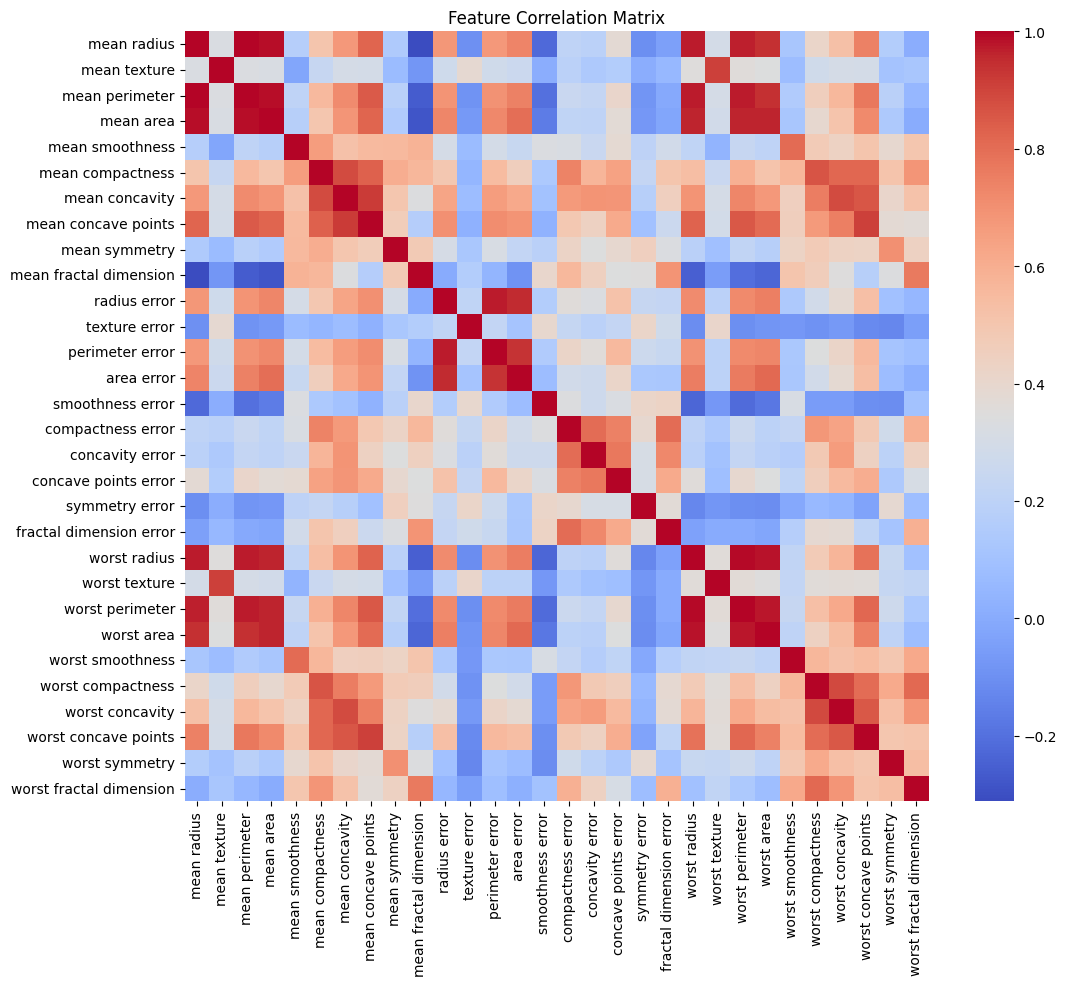

In [1]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Display the first few rows
X.head()

print(y.value_counts())

# Show feature correlation (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

<Axes: >

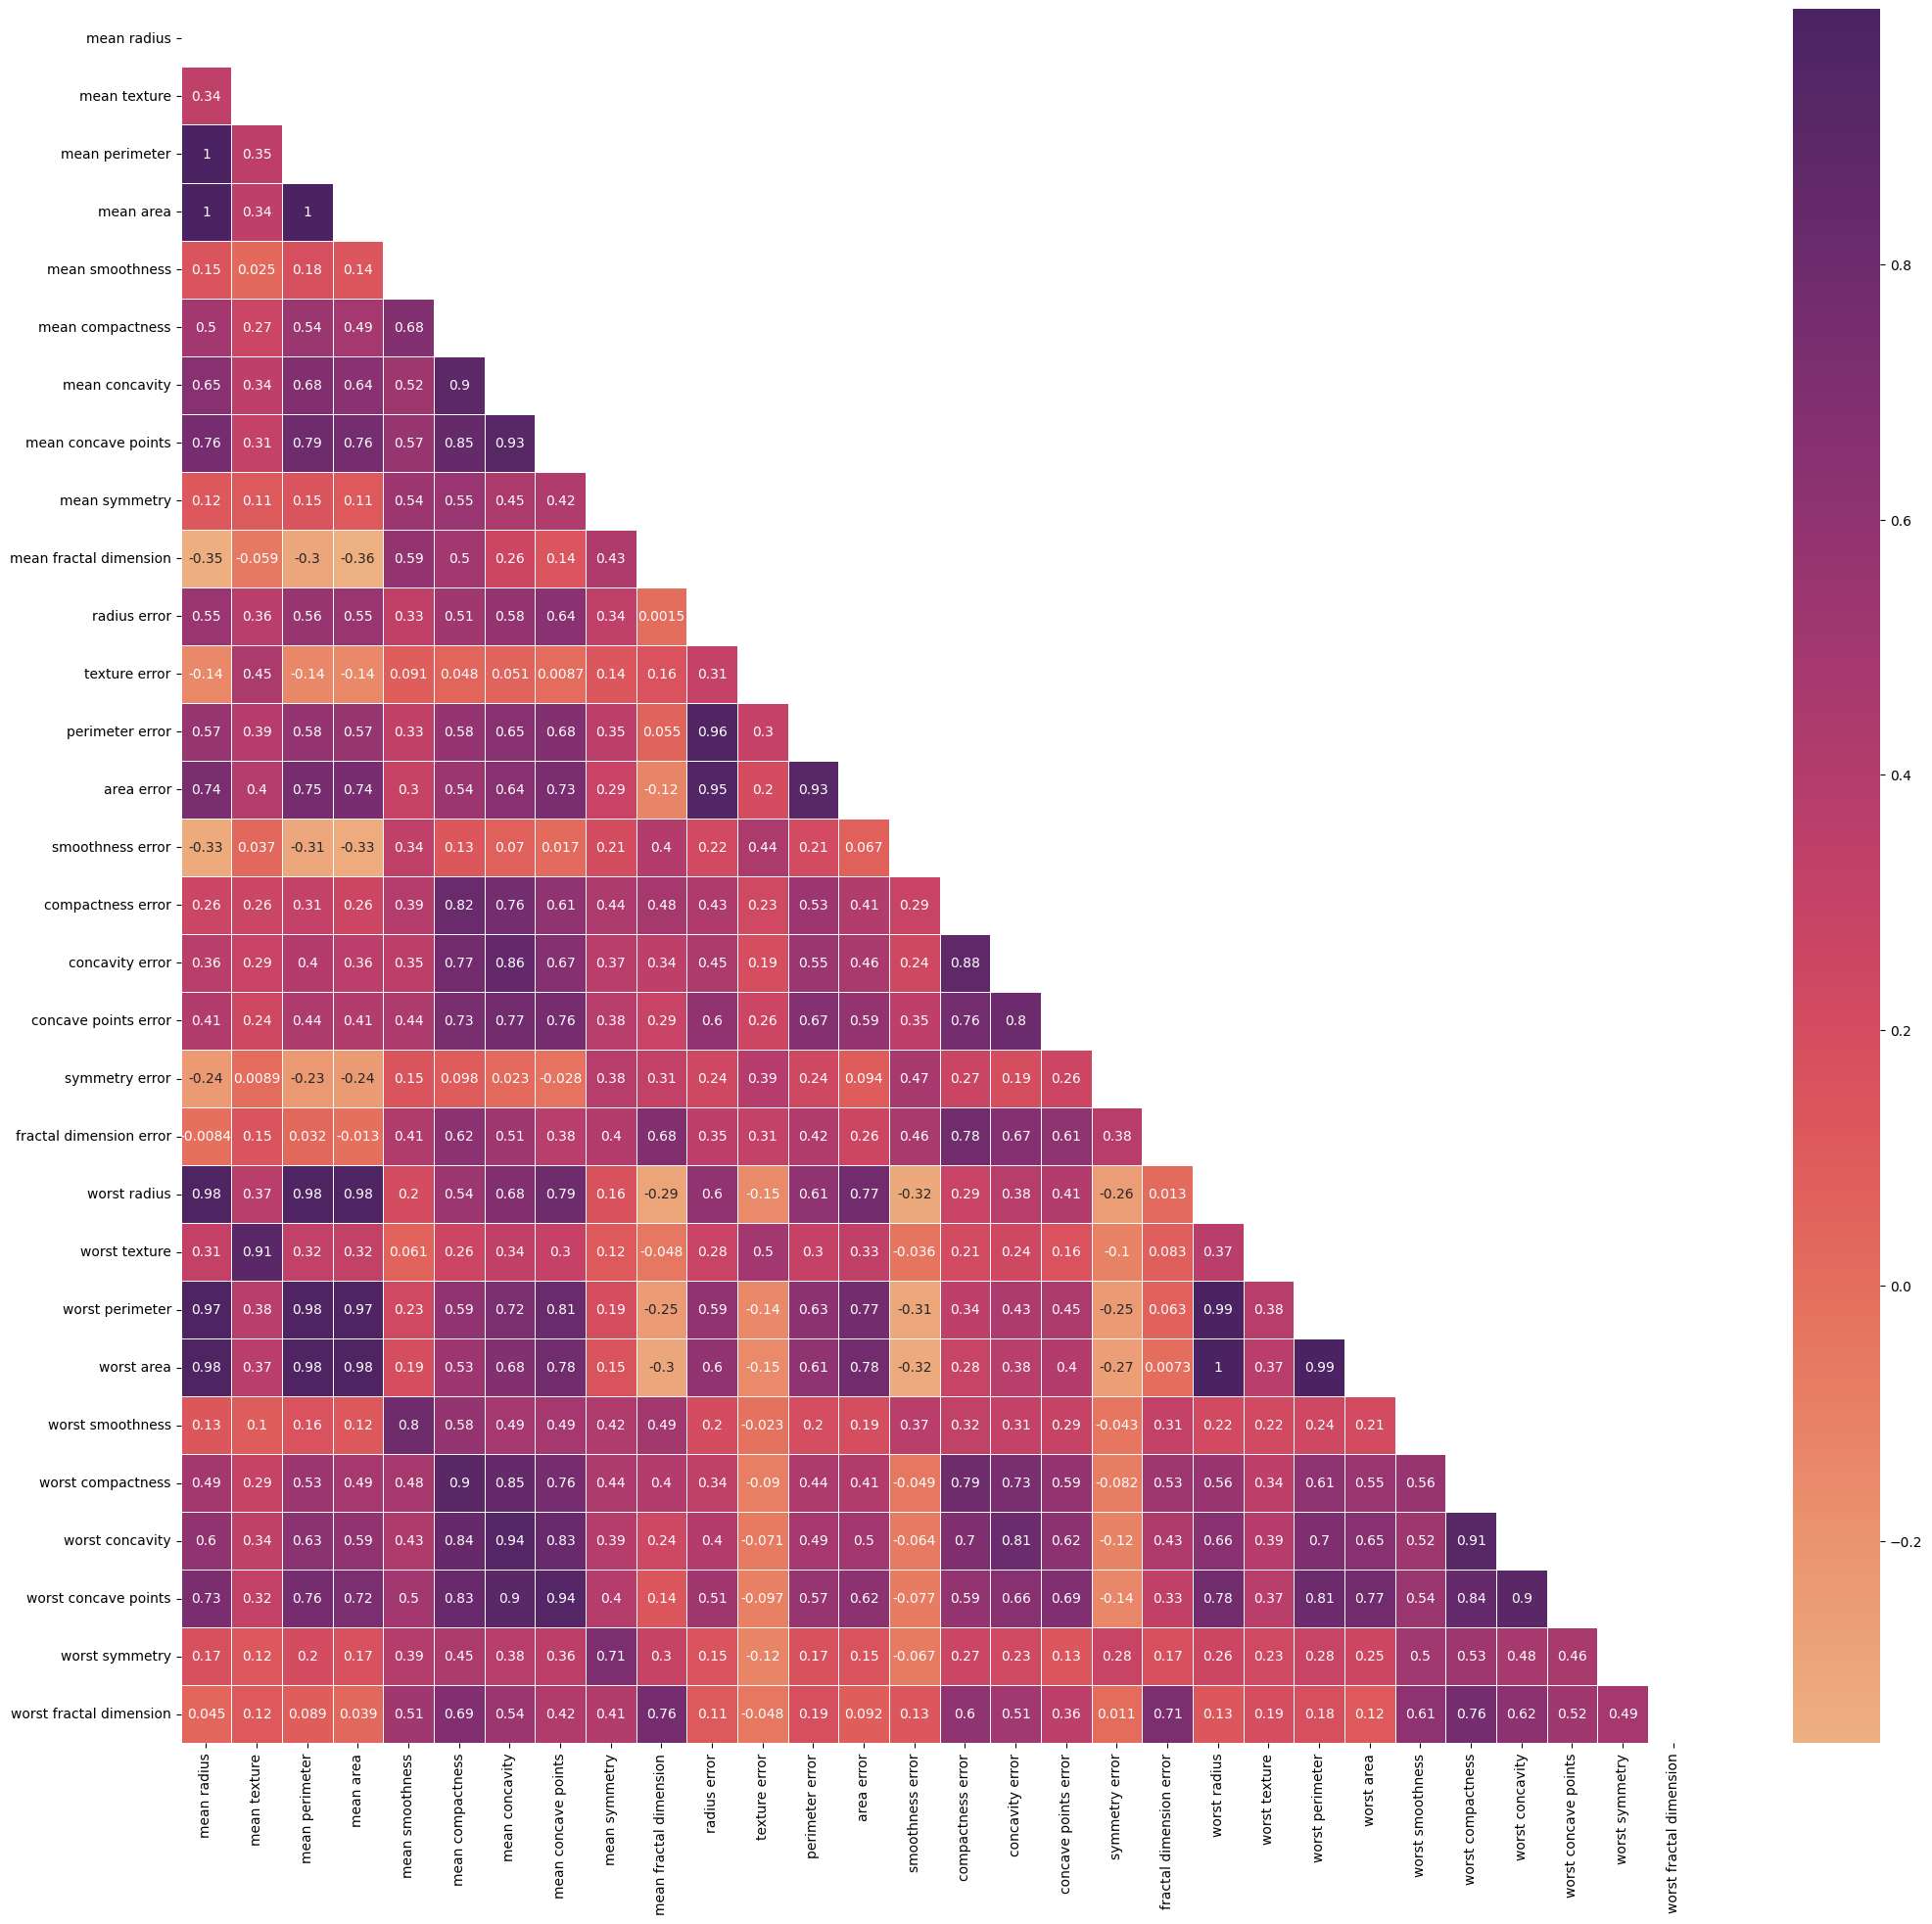

In [36]:
plt.figure(figsize=(25, 23))
mask = np.zeros_like(X.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension')])

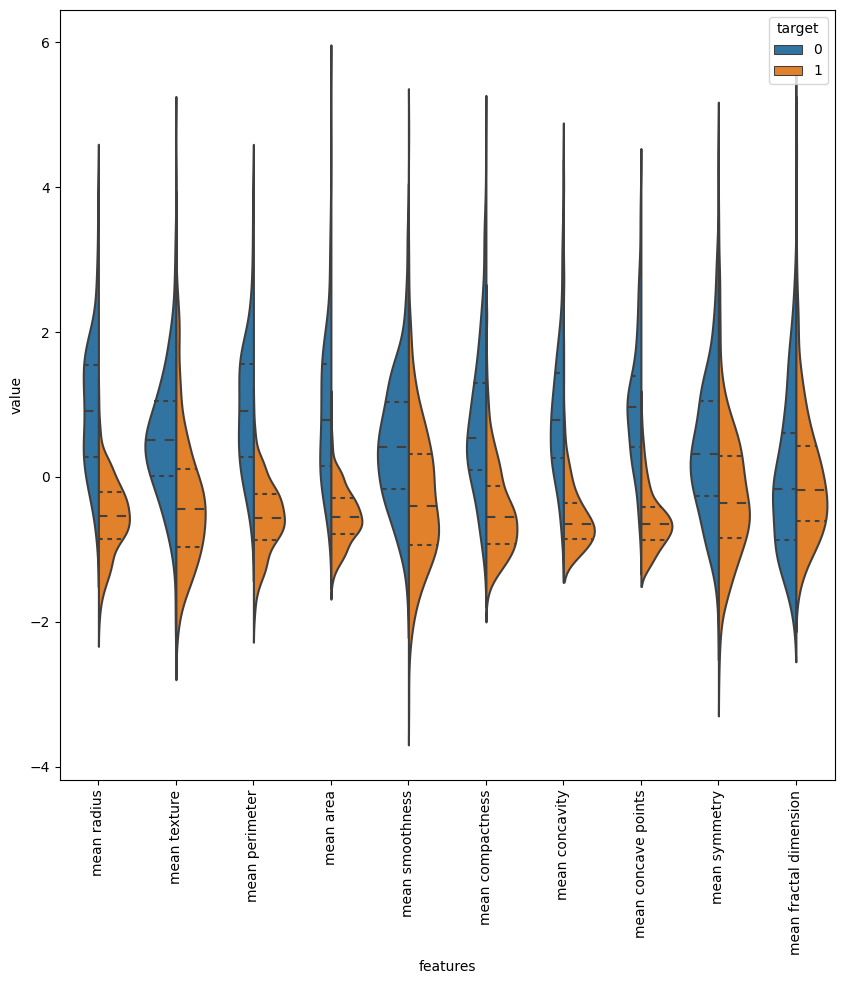

In [ ]:
#First 10 features
# 0 means malignant
# 1 means benign
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="target", ## target = diagnosis
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius error'),
  Text(1, 0, 'texture error'),
  Text(2, 0, 'perimeter error'),
  Text(3, 0, 'area error'),
  Text(4, 0, 'smoothness error'),
  Text(5, 0, 'compactness error'),
  Text(6, 0, 'concavity error'),
  Text(7, 0, 'concave points error'),
  Text(8, 0, 'symmetry error'),
  Text(9, 0, 'fractal dimension error')])

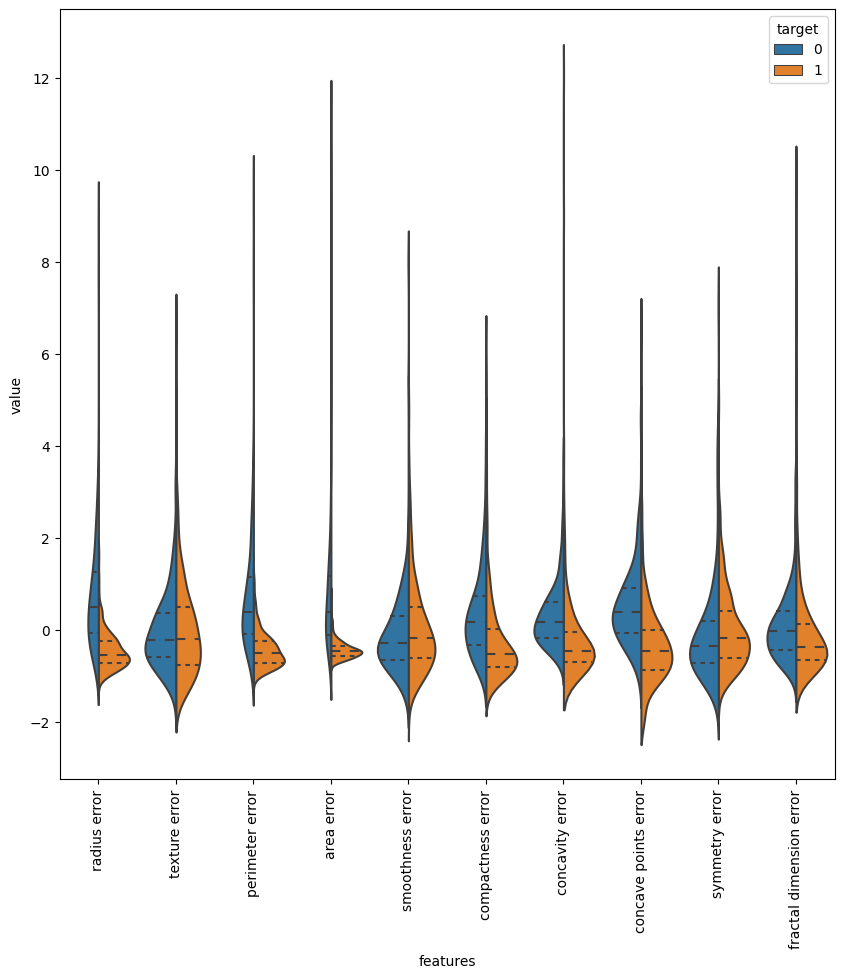

In [45]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'worst radius'),
  Text(1, 0, 'worst texture'),
  Text(2, 0, 'worst perimeter'),
  Text(3, 0, 'worst area'),
  Text(4, 0, 'worst smoothness'),
  Text(5, 0, 'worst compactness'),
  Text(6, 0, 'worst concavity'),
  Text(7, 0, 'worst concave points'),
  Text(8, 0, 'worst symmetry'),
  Text(9, 0, 'worst fractal dimension')])

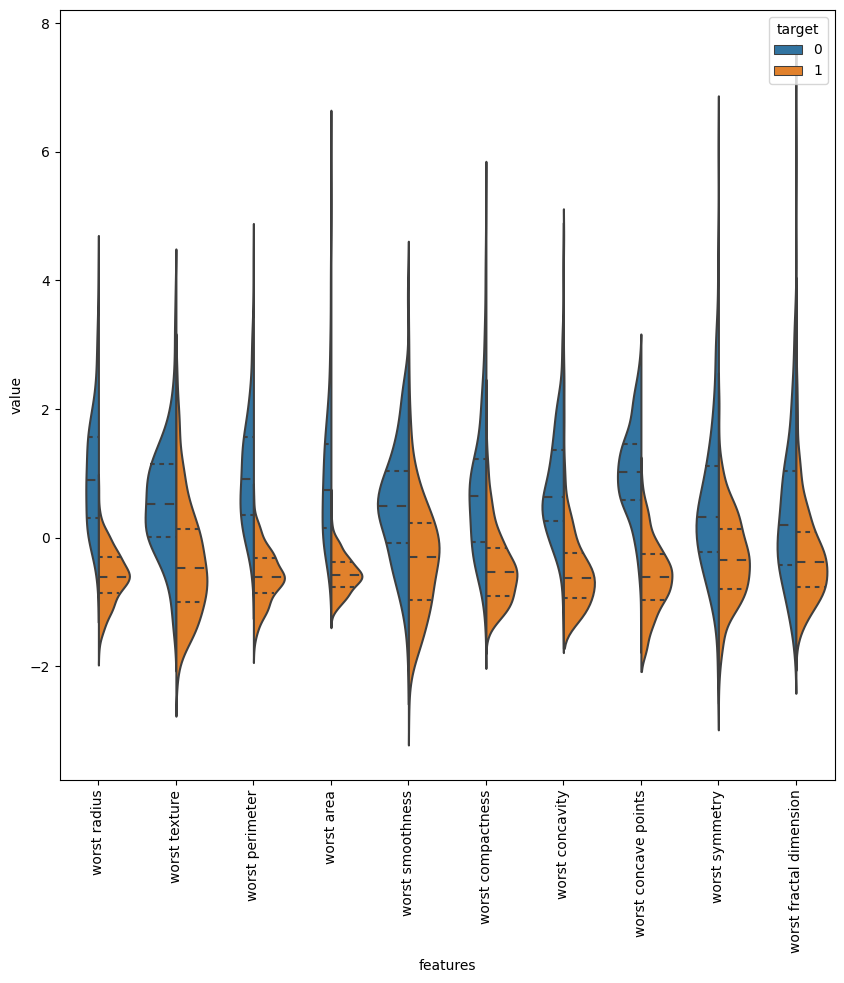

In [47]:
# Last ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=data,split=True, inner="quart")
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'worst radius'),
  Text(1, 0, 'worst texture'),
  Text(2, 0, 'worst perimeter'),
  Text(3, 0, 'worst area'),
  Text(4, 0, 'worst smoothness'),
  Text(5, 0, 'worst compactness'),
  Text(6, 0, 'worst concavity'),
  Text(7, 0, 'worst concave points'),
  Text(8, 0, 'worst symmetry'),
  Text(9, 0, 'worst fractal dimension')])

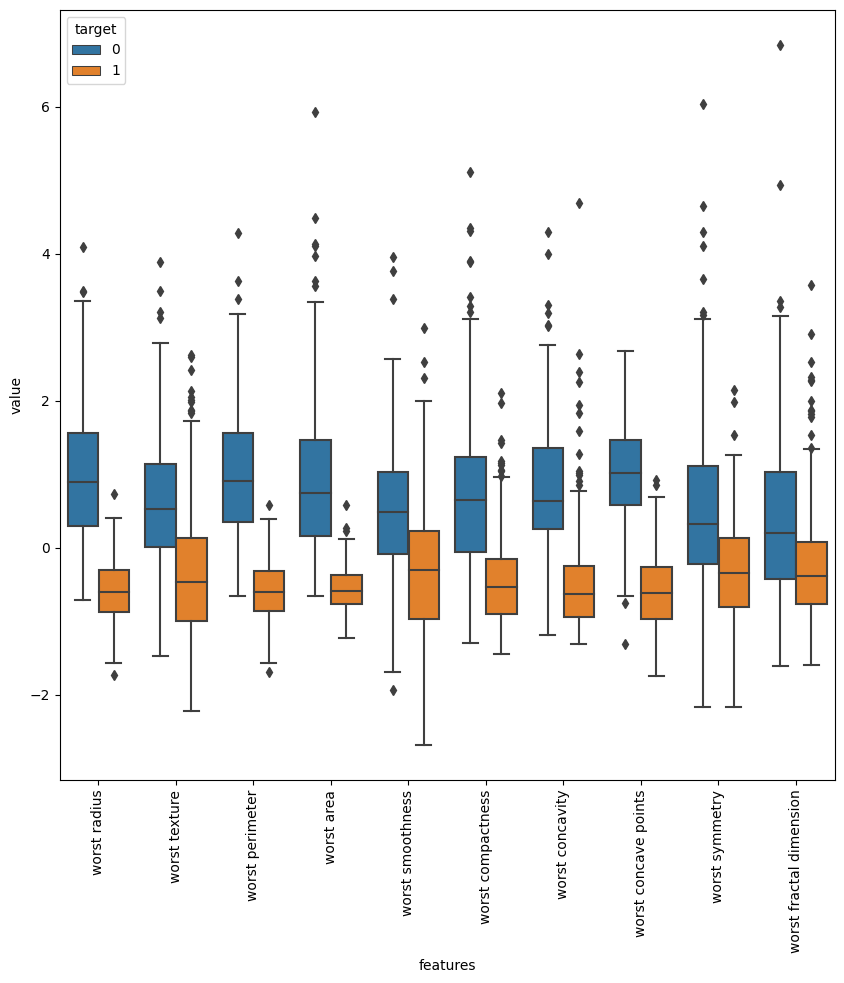

In [ ]:
# Find outliers via boxplot -> then remove
# however, the goal of the formative was to compare logistic regression
# to linear regression and if we were to remove outliers then it would greatly
# favor linear regression as we would be helping the model be "smarter"
 
# plt.figure(figsize=(10,10))
# sns.boxplot(x="features", y="value", hue="target", data=data)
# plt.xticks(rotation=90)

c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

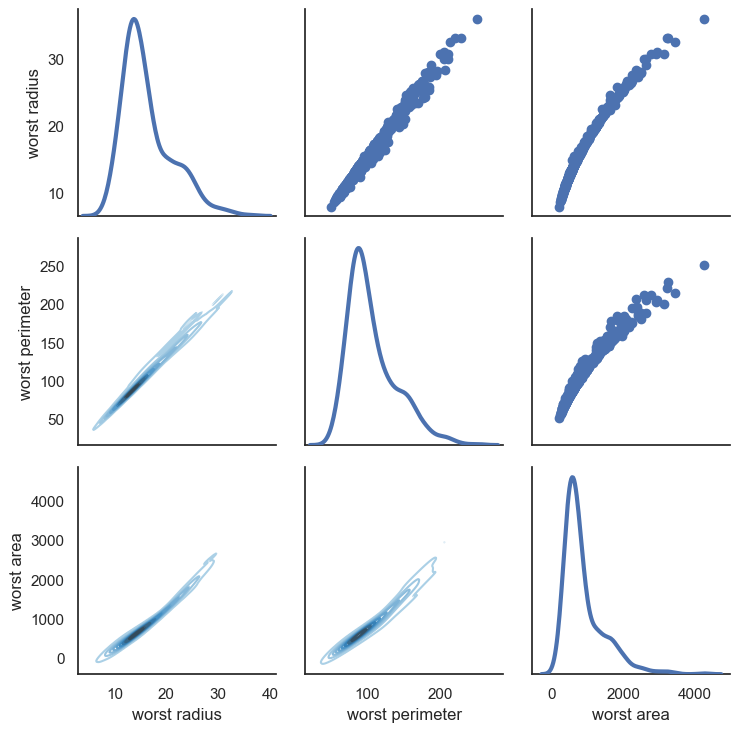

In [53]:
sns.set(style="white")
df = X.loc[:,['worst radius','worst perimeter','worst area']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaco

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension')])

c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 44.1% of the points

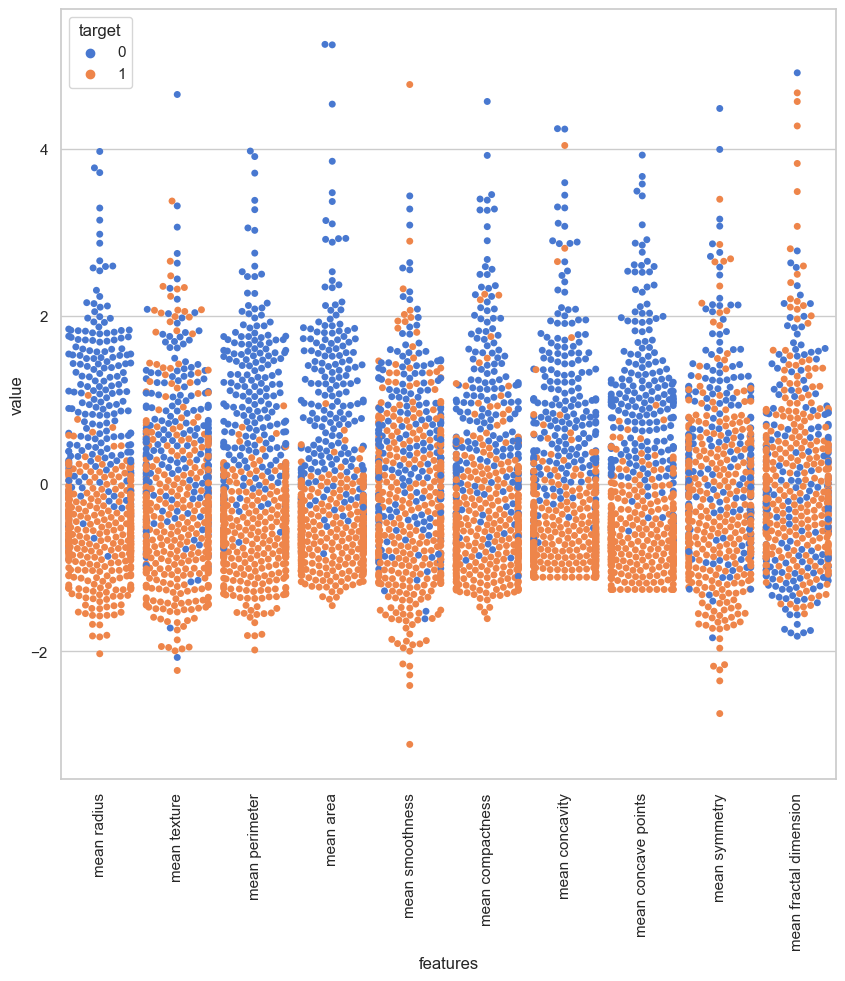

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std()) # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="target", data=data)
plt.xticks(rotation=90)

c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaco

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius error'),
  Text(1, 0, 'texture error'),
  Text(2, 0, 'perimeter error'),
  Text(3, 0, 'area error'),
  Text(4, 0, 'smoothness error'),
  Text(5, 0, 'compactness error'),
  Text(6, 0, 'concavity error'),
  Text(7, 0, 'concave points error'),
  Text(8, 0, 'symmetry error'),
  Text(9, 0, 'fractal dimension error')])

c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 62.0% of the points

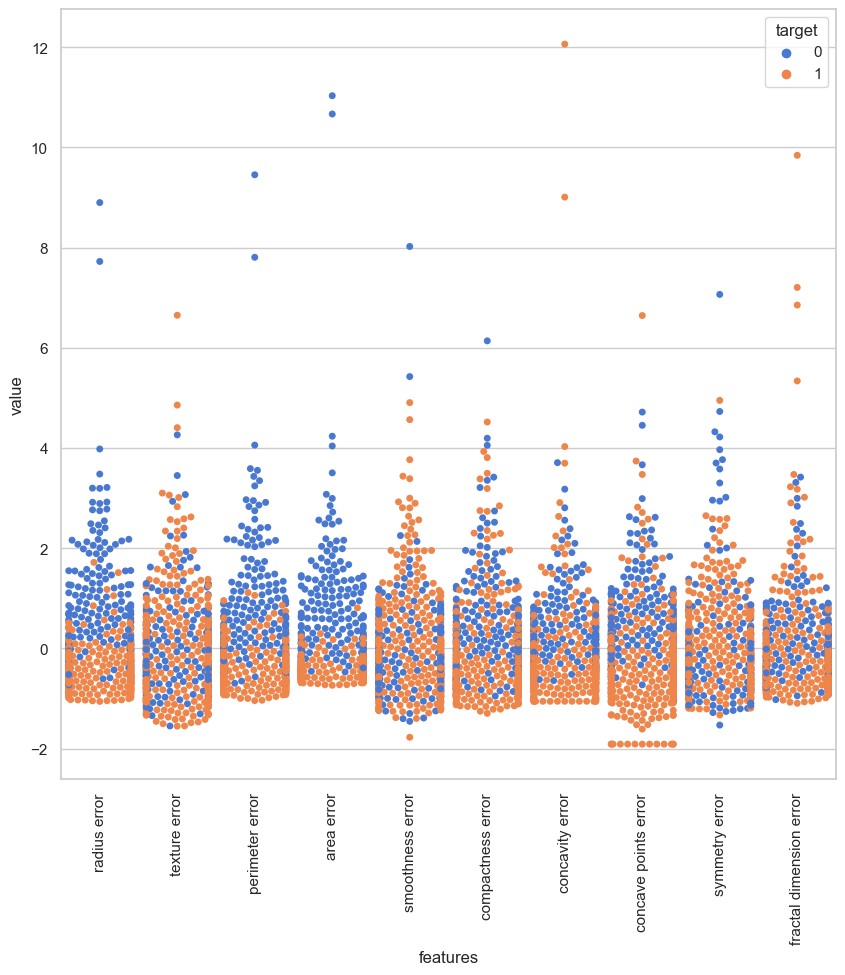

In [61]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="target", data=data)
plt.xticks(rotation=90)

c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaco

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'worst radius'),
  Text(1, 0, 'worst texture'),
  Text(2, 0, 'worst perimeter'),
  Text(3, 0, 'worst area'),
  Text(4, 0, 'worst smoothness'),
  Text(5, 0, 'worst compactness'),
  Text(6, 0, 'worst concavity'),
  Text(7, 0, 'worst concave points'),
  Text(8, 0, 'worst symmetry'),
  Text(9, 0, 'worst fractal dimension')])

c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\blasi\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.1% of the points

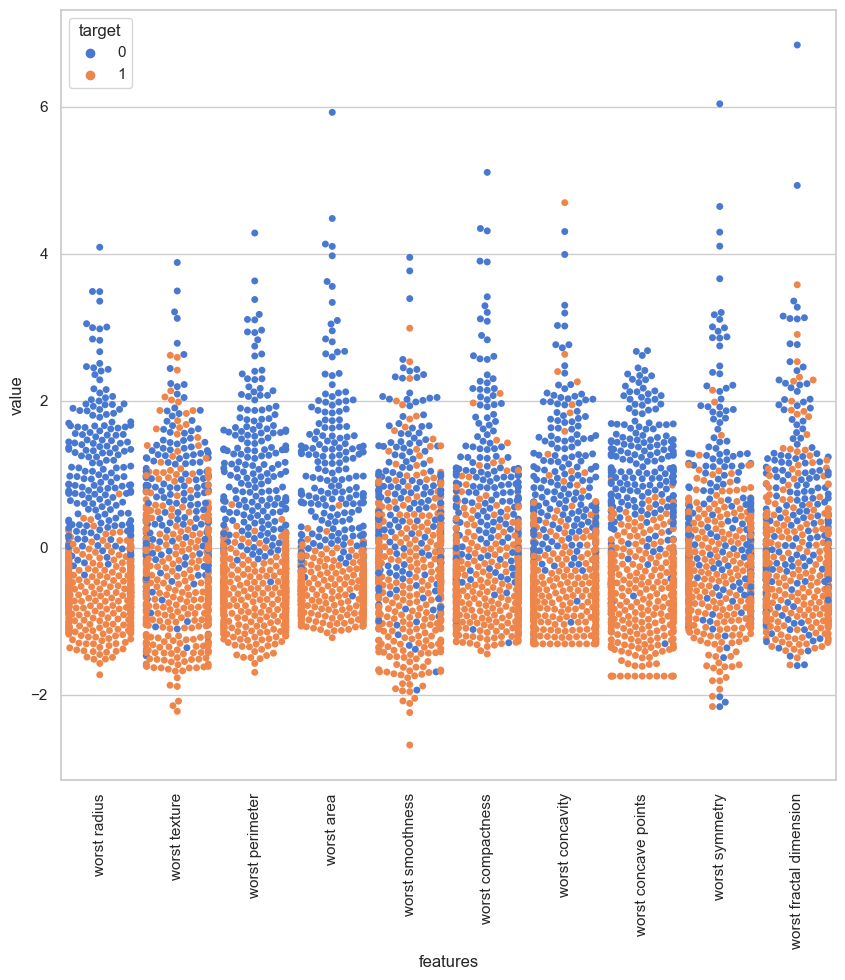

In [64]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="target", data=data)
plt.xticks(rotation=90)

In [3]:
# Select a subset of less relevant features for demonstration
less_relevant_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness']

X_selected = X[less_relevant_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Perform PCA for 2D visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)


In [5]:
# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_pca, y_train)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_pca, y_train)

LinearRegression()

In [ ]:
# Generate predictions
y_pred_logistic = logistic_model.predict(X_test_pca)
y_prob_logistic = logistic_model.predict_proba(X_test_pca)[:, 1]

y_pred_linear = linear_model.predict(X_test_pca)
y_pred_linear_binary = (y_pred_linear >= 0.5).astype(int)

# Logistic Regression Metrics
logistic_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_logistic),
    "Precision": precision_score(y_test, y_pred_logistic),
    "Recall": recall_score(y_test, y_pred_logistic),
    "F1 Score": f1_score(y_test, y_pred_logistic),
    "AUC Score": roc_auc_score(y_test, y_prob_logistic)
}

# Linear Regression (Thresholded) Metrics
linear_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_linear_binary),
    "Precision": precision_score(y_test, y_pred_linear_binary),
    "Recall": recall_score(y_test, y_pred_linear_binary),
    "F1 Score": f1_score(y_test, y_pred_linear_binary),
    "AUC Score": roc_auc_score(y_test, y_pred_linear)
}

# Display comparison
print("Logistic Regression Metrics:")
for metric, value in logistic_metrics.items():
    print(f"{metric}: {value:.2f}")

print("\nLinear Regression (Thresholded) Metrics:")
for metric, value in linear_metrics.items():
    print(f"{metric}: {value:.2f}")


Logistic Regression Metrics:
Accuracy: 0.90
Precision: 0.89
Recall: 0.96
F1 Score: 0.93
AUC Score: 0.98

Linear Regression (Thresholded) Metrics:
Accuracy: 0.89
Precision: 0.87
Recall: 0.97
F1 Score: 0.92
AUC Score: 0.98


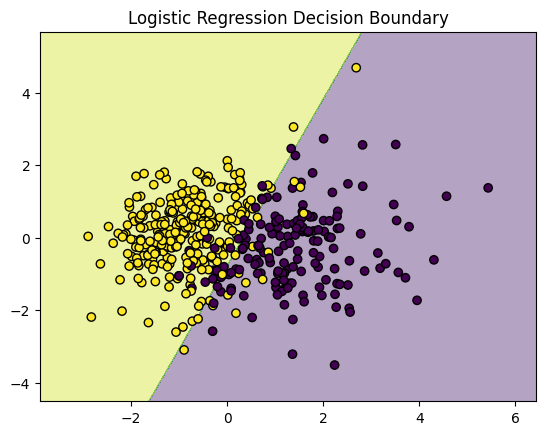

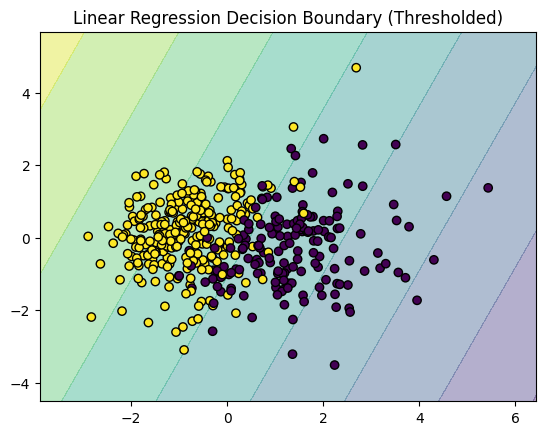

In [7]:
# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(logistic_model, X_train_pca, y_train, "Logistic Regression Decision Boundary")
plot_decision_boundary(linear_model, X_train_pca, y_train, "Linear Regression Decision Boundary (Thresholded)")


### Summary / Formative Assestment 1
- **Logistic Regression:** Provides a well-defined decision boundary and robust performance metrics, even with a more complex dataset. Logistic regression effectively handles binary classification, regardless of feature relevance.
- **Linear Regression:** Struggles with classification tasks on complex datasets, as demonstrated by its weaker decision boundary and poorer performance metrics.


### For Submission Before Dismissal


1. **Model Behavior:**
   - How do the decision boundaries differ between logistic regression and linear regression when applied to high-dimensional data?
   - Why does logistic regression handle class imbalance better than linear regression?


1. How do the decision boundaries differ between logistic regression and linear regression when applied to high-dimensional data?
  - Logistic Regression:
    - The decision boundary is **non-probabilistic** threshold at which the model predicts one class over the other. It indicates the point at which the model (Logistical Regression) decides to assign a data point to one class over another. Logistic regression minimizes cross-entropy, which is a measure of the difference between probability distributions.
    - It seperates the classes using a **sigmoid functio**, where it maps the probabilities of a data point between 0 and 1.
    - The decision boundary appers as a clear, sharp seperation where majority of data points are located at their respective positions with a 90% accuracy metric.

  - Linear Regression (Thresholded):
    - Linear regression, by nature, does not inhenrently work for classification but can be **thresholded** to approximate. The regression model is **probabilistic**, where it mainly returns a a numerical decimal value of the probability distribution for a specific class.
    - The decision boundary results from fitting a linear function and applying threshold values to the decision boundary. This is why there are paralel contour ines rather than a sharp decision boundary.
    - Linear thresholdled regression can misclassify points due to the exterem values in regression outputs.

2. Why does logistic regression handle class imbalance better than linear regression?
  - Logistic regression estimates **class probabilities**, allowing for better hnadling of imbalance data. Whereas linear regression predicts class probabilities continuously, where the class probabilities can be heavily influenced or correlated by majority class data.
  - Logistic regression naturally adjust decision boundares based on likelikood ratios by using the log-odds (logistic function). This means that for each input, logistic regression calculates how likely it belongs to one class versus another (likelihood ratio). Linear regression, on the other hand, tries to fit a single linear function to all data points, making it susceptible to being dominated by the majority class, leading to poor generalization.
  - Linear regression is more sensitive to outliers which leads to biased decision boundaries because it minimizes the sum of squared errors, which makes it highly sensitive to extreme values. That is why when outliers exist, the regression line can **shift significantly**, affecting the decision boundary and leads to incorrect classificiations. On the other hand, logistic regression uses bounded sigmoid function where its output between 0 and 1, which is more robust in nature by having a cap for extreme predictions and prevents outliers from pulling the decision boundary too far or biased towards one directions.


2. **Feature Importance:**
   - How can feature importance be determined for logistic regression? Which features contribute most to the classification decision?
   - How does the presence of irrelevant or highly correlated features impact both models?

1. How can feature importance be determined for logistic regression? Which features contribute most to the classification decision?
  - Adding irrelevant features **increseas dimensionality**, making the model harder to interpret. However, logistic regression can inherently assign near-zero weights to unimportant features to reduce their influence on the model.
    - TODO: Which features contribute mose to the classification decision

2. How does the presence of irrelevant or highly correlated features impact both models?
  - The presence of irrelevant features reduces the models interpretaility and can impact the overall performance. The affects of multicollineary varies on the two models. For linear regression, it is severly affected because it tried to assign **exact wieghts** to each feature leading to unstable predictions with high variance.
   

3. **Scalability:**
   - How would these models perform on a significantly larger dataset with millions of samples? Consider time complexity and scalability.
   - What strategies could be employed to optimize logistic regression for large-scale data?

4. **Robustness:**
   - What happens if the dataset contains significant noise or outliers? How do these models respond?
   - How would logistic and linear regression handle missing data or incomplete features?

5. **Interpretability:**
   - How does the interpretability of logistic regression compare to that of linear regression?
   - What are the trade-offs between model interpretability and predictive power when dealing with complex datasets?

6. **Metrics:**
   - **Accuracy:**
     - How does the accuracy of logistic regression compare to linear regression on this dataset, and what does this reveal about each model's overall performance?
   - **Precision and Recall:**
     - Compare the precision and recall scores for logistic regression and linear regression. What do these metrics indicate about each model's ability to correctly identify positive cases and avoid false positives?
   - **F1 Score:**
     - How do the F1 scores of the two models compare, and what does the F1 score tell us about the balance between precision and recall for each model?
   - **AUC Score:**
     - How does the AUC score of logistic regression compare to that of linear regression, and what does the AUC score reveal about each model's ability to discriminate between classes?
   - **Confusion Matrix:**
     - What insights can be drawn from the confusion matrix for both models, and how does it help identify the models' strengths and weaknesses in terms of true positives, false positives, true negatives, and false negatives?
